In [51]:
import pandas as pd
import numpy as np
import sklearn as sk

Data analysis and preparation

In [52]:
training_set = pd.read_csv("Training.csv")

In [53]:
print(training_set.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [54]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [55]:
print(training_set[:10])

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   
5        0          1                     1                    0          0   
6        1          0                     1                    0          0   
7        1          1                     0                    0          0   
8        1          1                     1                    0          0   
9        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0               

In [56]:
print(list(set(training_set['prognosis'].values)))

['Osteoarthristis', 'Arthritis', 'Peptic ulcer diseae', 'Hyperthyroidism', 'Typhoid', 'Gastroenteritis', 'Chronic cholestasis', 'Diabetes ', '(vertigo) Paroymsal  Positional Vertigo', 'GERD', 'Impetigo', 'Tuberculosis', 'Hypoglycemia', 'Pneumonia', 'Paralysis (brain hemorrhage)', 'Allergy', 'Heart attack', 'Acne', 'Drug Reaction', 'Fungal infection', 'Chicken pox', 'Dengue', 'Urinary tract infection', 'Migraine', 'Varicose veins', 'Psoriasis', 'AIDS', 'hepatitis A', 'Hepatitis B', 'Common Cold', 'Cervical spondylosis', 'Jaundice', 'Hepatitis D', 'Malaria', 'Hypertension ', 'Hepatitis C', 'Alcoholic hepatitis', 'Hypothyroidism', 'Hepatitis E', 'Dimorphic hemmorhoids(piles)', 'Bronchial Asthma']


In [59]:
training_labels = training_set['prognosis']
training_labels

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [62]:
training_set.drop("prognosis", axis=1, inplace=True)
print(training_set[:10])

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   
5        0          1                     1                    0          0   
6        1          0                     1                    0          0   
7        1          1                     0                    0          0   
8        1          1                     1                    0          0   
9        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0               

In [57]:
testing_set = pd.read_csv("Testing.csv")

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(MultinomialNB())

In [100]:
model.fit(training_set, training_labels)

Pipeline(steps=[('multinomialnb', MultinomialNB())])

In [102]:
testing_labels = testing_set['prognosis']
testing_set.drop("prognosis", axis=1, inplace=True)

In [125]:
labels = model.predict(testing_set)

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

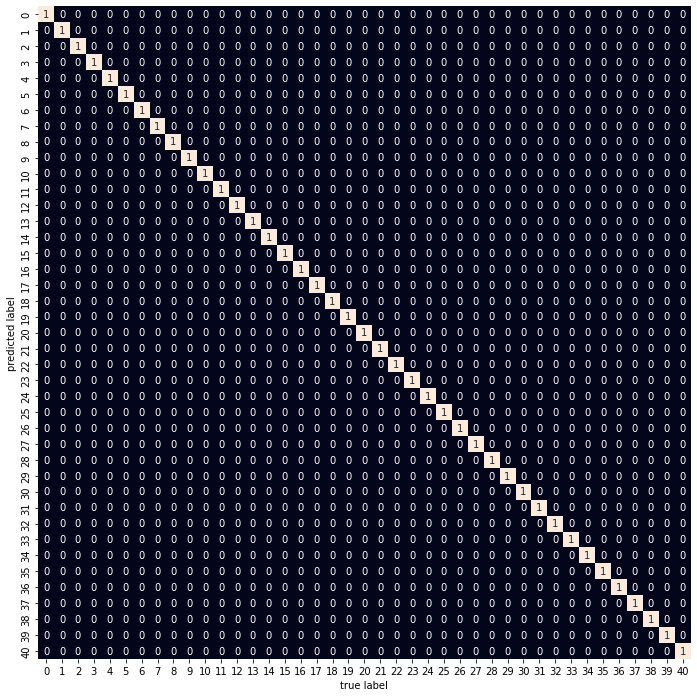

In [126]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(testing_labels, labels)
plt.figure(figsize=(15,12))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()